In [ ]:
"""!git clone https://github.com/histolab/histolab.git"""

In [1]:
# The path can also be read from a config file, etc.
OPENSLIDE_PATH = r'C:\A\openslide-win64-20220811\bin'

import os
if hasattr(os, 'add_dll_directory'):
    # Python >= 3.8 on Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide


import random
from typing import Tuple

import openslide
import PIL


class SlideRandomCrop:
    def __init__(self, patch_size: Tuple[int, int]):
        self.w_patch, self.h_patch = patch_size

    def __call__(self, slide:openslide.OpenSlide) -> PIL.Image.Image:
        w_slide, h_slide = slide.dimensions
        w_rand = random.randint(0, w_slide - self.w_patch)
        h_rand = random.randint(0, h_slide - self.h_patch)
        patch = slide.read_region(location=(w_rand, h_rand), level=0, size=(self.w_patch, self.h_patch))
        return patch


In [2]:
from histolab.slide import Slide
from histolab.tiler import ScoreTiler,RandomTiler,GridTiler
from histolab.scorer import NucleiScorer
import os
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from tqdm.notebook import tqdm
BASE_PATH = os.getcwd()

In [ ]:
# 천재 민재 코드

"""from histolab.slide import Slide
from histolab.tiler import ScoreTiler,RandomTiler,GridTiler
from histolab.scorer import NucleiScorer
import os
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from tqdm.notebook import tqdm
BASE_PATH = os.getcwd()
n=0

# for img_path in tqdm(sorted(Path(r"D://mat08//Downloads//새 폴더//cancer_cls//train_imgs").glob("*.png"))):
#     print(img_path)
#     path = r"D://patch_img//random"
#     CRC_slide = Slide(img_path, processed_path=path)
#
#     random_tiles_extractor  = RandomTiler(
#         tile_size=(512, 512),
#         n_tiles=30,
#         level=0,
#         seed=42,
#         check_tissue=False,  # default
#         tissue_percent=80.0,  # default
#         prefix=f"512_512_{n}/",  # save tiles in the "random" subdirectory of slide's processed_path
#         suffix=".png"  # default
#     )
#     n+=1
#     random_tiles_extractor.locate_tiles(slide=CRC_slide)
#
#     random_tiles_extractor.extract(CRC_slide)

m=0
for img_path in tqdm(sorted(Path(r"C:\A\breastCancer\baseline\input\train_imgs").glob("*.png"))):
    img_name = str(img_path).split('\\')[-1].split('.')[0]
    path = r"C:\A\breastCancer\histolab_breast\GrildTiler"
    CRC_slide = Slide(img_path, processed_path=path)

    grid_tiles_extractor = GridTiler(
        tile_size=(512, 512),
        level=0,
        check_tissue=False,
        pixel_overlap=0,  # default
        prefix=f"{img_name}/",  # save tiles in the "grid" subdirectory of slide's processed_path
        suffix=".png"  # default
    )
    m+=1
    grid_tiles_extractor.locate_tiles(slide=CRC_slide)
    grid_tiles_extractor.extract(CRC_slide)
    if m == 5 : break"""

# TCGA DATA

In [ ]:
"""from histolab.data import prostate_tissue, ovarian_tissue
prostate_svs, prostate_path = prostate_tissue()
ovarian_svs, ovarian_path = ovarian_tissue()

"""

# Slide initialization


In [ ]:
"""from histolab.slide import Slide

import os
from glob import glob
data = glob(r'C:\A\breastCancer\baseline\input\train_imgs/*.png', recursive=True)
breast_path = r'C:\A\breastCancer\histolab\examples\CMU-1.tiff'
BASE_PATH = os.getcwd()

#PROCESS_PATH_PROSTATE = os.path.join(BASE_PATH, 'prostate', 'processed')
#PROCESS_PATH_OVARIAN = os.path.join(BASE_PATH, 'ovarian', 'processed')

PROCESS_PATH_BREAST = os.path.join(BASE_PATH, 'breast', 'processed')
#prostate_slide = Slide(prostate_path, processed_path=PROCESS_PATH_PROSTATE)
#ovarian_slide = Slide(ovarian_path, processed_path=PROCESS_PATH_OVARIAN)
breast_slide = Slide(breast_path, processed_path=PROCESS_PATH_BREAST)

print(f"Slide name: {breast_slide.name}")
print(f"Levels: {breast_slide.levels}")
print(f"Dimensions at level 0: {breast_slide.dimensions}")
print(f"Dimensions at level 1: {breast_slide.level_dimensions(level=1)}")
print(f"Dimensions at level 2: {breast_slide.level_dimensions(level=2)}")

print(
    "Native magnification factor:",
    prostate_slide.level_magnification_factor()
)

print(
    "Magnification factor corresponding to level 1:",
    prostate_slide.level_magnification_factor(level=1),
)
prostate_slide.thumbnail
prostate_slide.show()
ovarian_slide.thumbnail
ovarian_slide.show()
"""

# 무작위 추출



In [ ]:
from histolab.tiler import RandomTiler

In [ ]:
"""random_tiles_extractor = RandomTiler(
    tile_size=(512, 512),
    n_tiles=30,
#    level=1,
    seed=42,
    check_tissue=True, # default
    tissue_percent=80.0, # default
    prefix="random/", # save tiles in the "random" subdirectory of slide's processed_path
    suffix=".png" # default
)
random_tiles_extractor.locate_tiles(
    slide=breast_slide,
    scale_factor=24,  # default
    alpha=128,  # default
    outline="red",  # default
)
random_tiles_extractor.extract(breast_slide)
"""

In [ ]:
from histolab.masks import TissueMask

img_path = r'C:\A\breastCancer\baseline\input\train_imgs\BC_01_3248.png'
img_name = str(img_path).split('\\')[-1].split('.')[0]

path = r"C:\A\breastCancer\histolab_breast\Random1"
CRC_slide = Slide(img_path, processed_path=path)
print(f"Dimensions at level 0: {CRC_slide.level_dimensions(level=0)}")

random_tiles_extractor  = RandomTiler(
    tile_size=(128, 128),
    n_tiles=300,
    level=0,
    seed=88,
    check_tissue=False,  #default
    tissue_percent=80.0,  #default
    prefix=f"{img_name}/",  #save tiles in the "random" subdirectory of slide's processed_path
    suffix=".png"  #default
)

random_tiles_extractor.locate_tiles(
    slide=CRC_slide,
    scale_factor=8,  # default
    alpha=1024,  # default
    extraction_mask=TissueMask(),
    outline="red",  # default
)



In [ ]:
#random_tiles_extractor.locate_tiles(slide=CRC_slide)
random_tiles_extractor.extract(
    CRC_slide)

In [ ]:
n=0

for img_path in tqdm(sorted(Path(r"C:\A\breastCancer\baseline\input\train_imgs").glob("*.png"))):
    img_name = str(img_path).split('\\')[-1].split('.')[0]
    path = r"C:\A\breastCancer\histolab_breast\RandomTiler"
    CRC_slide = Slide(img_path, processed_path=path)
    
    random_tiles_extractor  = RandomTiler(
        tile_size=(512, 512),
        n_tiles=30,
        level=0,
        seed=42,
        check_tissue=False,  #default
        tissue_percent=80.0,  #default
        prefix=f"{img_name}/",  #save tiles in the "random" subdirectory of slide's processed_path
        suffix=".png"  #default
    )
    
    n+=1
    random_tiles_extractor.locate_tiles(
        slide=CRC_slide,
        scale_factor=24,  # default
        alpha=128,  # default
        outline="red",  # default
    )

    #random_tiles_extractor.locate_tiles(slide=CRC_slide)
    random_tiles_extractor.extract(CRC_slide)
    #if n == 5 : break

# Grid Extraction


In [ ]:
from histolab.tiler import GridTiler


In [ ]:
"""grid_tiles_extractor = GridTiler(
   tile_size=(512, 512),
   level=0,
   check_tissue=False,
   pixel_overlap=0, # default
   prefix="grid/", # save tiles in the "grid" subdirectory of slide's processed_path
   suffix=".png" # default
)
grid_tiles_extractor.locate_tiles(
    slide=ovarian_slide,
    scale_factor=64,
    alpha=64,
    outline="#046C4C",
)
grid_tiles_extractor.extract(ovarian_slide)"""

Dimensions at level 0: (4315, 3657)
BC_01_0268 C:\A\breastCancer\histolab_breast\Random2


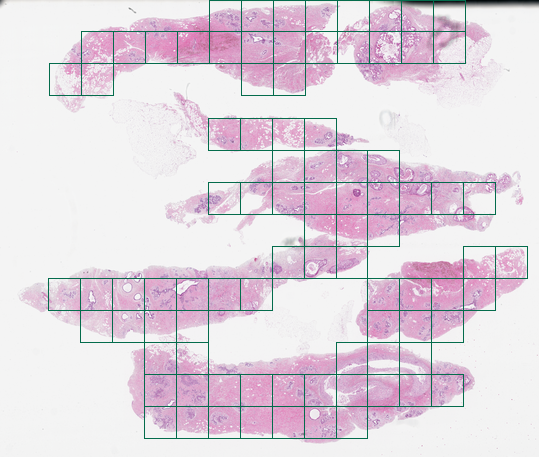

In [3]:
from histolab.masks import TissueMask
m = 0
img_path = r'C:\A\breastCancer\baseline\input\train_imgs\BC_01_0268.png'
img_name = str(img_path).split('\\')[-1].split('.')[0]

path = r"C:\A\breastCancer\histolab_breast\Random2"
CRC_slide = Slide(img_path, processed_path=path)
print(f"Dimensions at level 0: {CRC_slide.level_dimensions(level=0)}")

print(img_name,path)

grid_tiles_extractor = GridTiler(
    tile_size=(256,256),
    level=0,
    check_tissue=False,
    #tissue_percent=0.0000000000000000001,  #default
    pixel_overlap=0,  # default
    prefix=f"{img_name}/",  # save tiles in the "grid" subdirectory of slide's processed_path
    suffix=".png"  # default
)
m+=1
grid_tiles_extractor.locate_tiles(
    slide=CRC_slide,
    extraction_mask=TissueMask(),
    scale_factor=8,
    alpha=256,
    outline="#046C4C",
)


Dimensions at level 0: (3651, 3182)


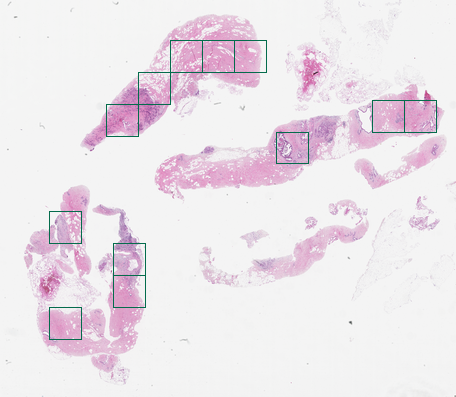

In [8]:
from histolab.masks import TissueMask
m = 0
img_path = r'C:\A\breastCancer\baseline\input\train_imgs\BC_01_0674.png'
img_name = str(img_path).split('\\')[-1].split('.')[0]

path = r"C:\A\breastCancer\histolab_breast\Random2"
CRC_slide = Slide(img_path, processed_path=path)
print(f"Dimensions at level 0: {CRC_slide.level_dimensions(level=0)}")


grid_tiles_extractor = GridTiler(
    tile_size=(256,256),
    level=0,
    check_tissue=True,
    tissue_percent=80.0,  #default
    pixel_overlap=0,  # default
    prefix=f"{img_name}/",  # save tiles in the "grid" subdirectory of slide's processed_path
    suffix=".png"  # default
)
m+=1
grid_tiles_extractor.locate_tiles(
    slide=CRC_slide,
    extraction_mask=TissueMask(),
    scale_factor=8,
    alpha=256,
    outline="#046C4C",
)


In [ ]:
grid_tiles_extractor.extract(
    slide=CRC_slide,
    extraction_mask=TissueMask(),
    )


In [9]:
m=0
for img_path in tqdm(sorted(Path(r"C:\A\breastCancer\baseline\input\train_imgs").glob("*.png"))):
    img_name = str(img_path).split('\\')[-1].split('.')[0]
    path = r"C:\A\breastCancer\histolab_breast\GrildTiler256"
    CRC_slide = Slide(img_path, processed_path=path)

    grid_tiles_extractor = GridTiler(
        tile_size=(256, 256),
        level=0,
        check_tissue=False,
        pixel_overlap=0,  # default
        prefix=f"{img_name}/{img_name}_",  # save tiles in the "grid" subdirectory of slide's processed_path
        suffix=".png"  # default
    )
    m+=1
    print(m)
    grid_tiles_extractor.locate_tiles(
        slide=CRC_slide,
        extraction_mask=TissueMask(),
        scale_factor=64,
        alpha=64,
        outline="#046C4C",
    )
    grid_tiles_extractor.extract(
        slide=CRC_slide,
        extraction_mask=TissueMask(),
        )

  0%|          | 0/1000 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# Score-based extraction


타일 ​​데이터 세트를 사용할 작업에 따라 추출된 타일이 똑같이 유익하지 않을 수 있습니다. 그리드 구조로 추출된 모든 타일 중 특정 스코어링 기능을 기반으로 " 가장 ScoreTiler 좋은" 타일만 저장할 수 있습니다. 

예를 들어, 우리의 목표가 난소 슬라이드에서 유사분열 활동을 감지하는 것이라고 가정해 보겠습니다. 이 경우 핵이 거의 또는 전혀 없는 타일보다 핵이 더 많이 존재하는 타일이 더 좋습니다. 

NucleiScorer모듈의 기능을 활용하여 scorer조직의 비율과 헤마톡실린 염색에 따라 추출된 타일을 주문할 수 있습니다. 

특히, 점수는 타일 t 에서 핵 의 백분율과 조직의 백분율로 계산됩니다

In [ ]:
from histolab.tiler import ScoreTiler
from histolab.scorer import NucleiScorer

In [ ]:
"""scored_tiles_extractor = ScoreTiler(
    scorer = NucleiScorer(),
    tile_size=(512, 512),
    n_tiles=100,
    level=0,
    check_tissue=True,
    tissue_percent=80.0,
    pixel_overlap=0, # default
    prefix="scored/", # save tiles in the "scored" subdirectory of slide's processed_path
    suffix=".png" # default
)
"""

In [ ]:
from histolab.masks import TissueMask

k = 0
img_path = r'C:\A\breastCancer\baseline\input\train_imgs\BC_01_3013.png'
img_name = str(img_path).split('\\')[-1].split('.')[0]

path = r"C:\A\breastCancer\histolab_breast\Random3"
CRC_slide = Slide(img_path, processed_path=path)
print(f"Dimensions at level 0: {CRC_slide.level_dimensions(level=0)}")



scored_tiles_extractor = ScoreTiler(
    scorer = NucleiScorer(),
    tile_size=(256, 256),
    n_tiles=100,
    level=0,
    check_tissue=False,
    tissue_percent=80.0,
    pixel_overlap=0, # default
    prefix=f"{img_name}/", # save tiles in the "scored" subdirectory of slide's processed_path
    suffix=".png" # default
)

k+=1
grid_tiles_extractor.locate_tiles(
        slide=CRC_slide,
        extraction_mask=TissueMask(),
        scale_factor=8,
        alpha=128,
        outline="#046C4C",)

In [ ]:
k=0
for img_path in tqdm(sorted(Path(r"C:\A\breastCancer\baseline\input\train_imgs").glob("*.png"))):
    img_name = str(img_path).split('\\')[-1].split('.')[0]
    path = r"C:\A\breastCancer\histolab_breast\ScoreTiler"
    CRC_slide = Slide(img_path, processed_path=path)

    scored_tiles_extractor = ScoreTiler(
        scorer = NucleiScorer(),
        tile_size=(512, 512),
        n_tiles=100,
        level=0,
        check_tissue=False,
        tissue_percent=80.0,
        pixel_overlap=0, # default
        prefix=f"{img_name}/", # save tiles in the "scored" subdirectory of slide's processed_path
        suffix=".png" # default
    )

    k+=1
    grid_tiles_extractor.locate_tiles(slide=CRC_slide)

    summary_filename = f"summary_ovarian_tiles_{k}.csv"
    SUMMARY_PATH = os.path.join(CRC_slide.processed_path, summary_filename)

    scored_tiles_extractor.extract(CRC_slide, report_path=SUMMARY_PATH)
    if k == 5 : break

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os                                
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

In [ ]:
from glob import glob
data = glob(r'C:\A\breastCancer\baseline\input\train_imgs/*.png', recursive=True)

In [ ]:
import torchvision.transforms as tf
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

for i in data[:1]:
    img=cv2.imread(i)
    plt.imshow(img,cmap='binary')
    plt.show()

In [ ]:
pil_image=Image.fromarray(img)
print(pil_image.show())
crop=tf.RandomCrop(512)
crop.forward(pil_image)

In [ ]:
#return i, j, th, tw
i,j,h,w=crop.get_params(pil_image,[512,512])
print(i,j,h,w)


In [ ]:
crop=tf.RandomCrop(512)
i,j,k,l=crop.get_params(pil_image,[512,512])

In [ ]:
print(i,j,k,l)
crop.forward(pil_image)

In [ ]:
#이미지의 크기 출력
print(pil_image.size)
 
# 이미지 자르기 crop함수 이용 ex. crop(left,up, rigth, down)
croppedImage=pil_image.crop((i,i,j,j))
 
croppedImage.show()
 
 
#croppedImage.save('croppedImage.PNG')


In [ ]:
print("잘려진 사진 크기 :",croppedImage.size)


In [ ]:
# Importing Image class from PIL module
from PIL import Image

# Opens a image in RGB mode
#im = Image.open(r"C:\Users\Admin\Pictures\geeks.png")

# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = pil_image.size

# Setting the points for cropped image
left = 5
top = height / 4
right = 164
bottom = 3 * height / 4

# Cropped image of above dimension
# (It will not change original image)
im1 = pil_image.crop((left, top, right, bottom))

# Shows the image in image viewer
im1.show()


In [ ]:
# The path can also be read from a config file, etc.
OPENSLIDE_PATH = r'C:\A\openslide-win64-20220811\bin'

import os
if hasattr(os, 'add_dll_directory'):
    # Python >= 3.8 on Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide


import random
from typing import Tuple

import openslide
import PIL


class SlideRandomCrop:
    def __init__(self, patch_size: Tuple[int, int]):
        self.w_patch, self.h_patch = patch_size

    def __call__(self, slide:openslide.OpenSlide) -> PIL.Image.Image:
        w_slide, h_slide = slide.dimensions
        w_rand = random.randint(0, w_slide - self.w_patch)
        h_rand = random.randint(0, h_slide - self.h_patch)
        patch = slide.read_region(location=(w_rand, h_rand), level=0, size=(self.w_patch, self.h_patch))
        return patch


In [ ]:
images=[]
labels=[]
for i in data[:15000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(28,28))
        images.append(img_1)
        labels.append(label)

In [ ]:
x=np.stack(images)

In [ ]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [ ]:
#normalize the data
x=x/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [ ]:
!pip install tf-nightly

In [ ]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers

In [ ]:
def modelResNet50():
    model = models.Sequential()
    model.add(ResNet50(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(2, activation = "sigmoid"))
    
    return model 
model = modelResNet50()
model.summary()

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(x,y,epochs=100,validation_split=0.4,batch_size=56)

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis')
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()



In [ ]:
IMG = Image.open('../input/breast-histopathology-images/10253/0/10253_idx5_x1001_y1101_class0.png')
print(type(IMG))
IMG = IMG.resize((100, 100))
IMG = np.array(IMG)
print('po array = {}'.format(IMG.shape))
IMG = np.true_divide(IMG, 255)
IMG = IMG.reshape(-1,100, 100,3)
print(type(IMG), IMG.shape)
predictions = model.predict_classes(IMG)
print(model)
predictions_c = model.predict_classes(IMG)
print(predictions, predictions_c)
model.predict_classes(IMG)
model.predict(IMG)
print(predictions_c)

In [ ]:
classes = {'TRAIN': ['Non Malignant (No Cancer)','Malignant'],
           'TEST': ['Non Malignant (No Cancer)','Malignant']}

predicted_class = classes['TRAIN'][predictions_c[0]]
print('We think that is {}.'.format(predicted_class.lower()))

In [ ]:
# Save the Model Weights
model.save_weights('_model_.h5')

# Save the Model to JSON
model_json = model.to_json()
with open('_model_.json', 'w') as json_file:
    json_file.write(model_json)
    
print('Model saved to the disk.')